In [4]:
# Load the data

import numpy as np
import pandas as pd

data = pd.read_csv('../../../playground-series-s4e3/train.csv', index_col='id')

# Display the first few rows of the dataset
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [11]:
# Count the number of rows and features
print("Number of data points:", data.shape[0])
print("Number of features:", data.shape[1])
print('\n\n-------------------------------------------------', end='\n\n\n')

# Check for any missing values
print("Missing values in each column:\n", data.isnull().sum())

print('\n\n-------------------------------------------------', end='\n\n\n')

# Descriptive statistics to help with the initial analysis
print("Data types and initial stats:\n", data.describe(include='all'))

Number of data points: 19219
Number of features: 34


-------------------------------------------------


Missing values in each column:
 X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                

In [30]:
# define the lists of column names
column_names = data.columns.tolist()
print("Column names:\n\n", column_names, end='\n\n')
features_all = column_names[:27]
print('All Features:\n\n', features_all, end='\n\n')
features_cat = [features_all[11],features_all[12],features_all[20]]
print('Categorical features:\n\n', features_cat, end='\n\n')
features_num = [i for i in features_all if i not in features_cat]
print('Numerical features:\n\n', features_num, end='\n\n')
defect_types = column_names[27:34]
print('Defect types:\n\n', defect_types)

Column names:

 ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

All Features:

 ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


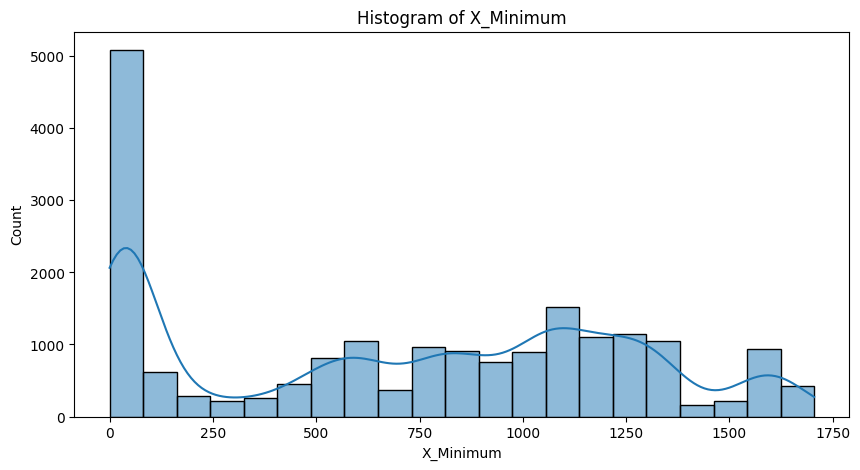

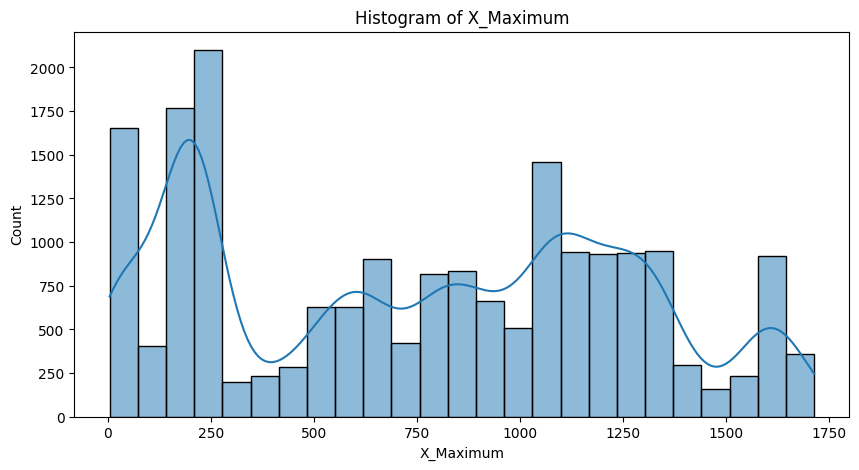

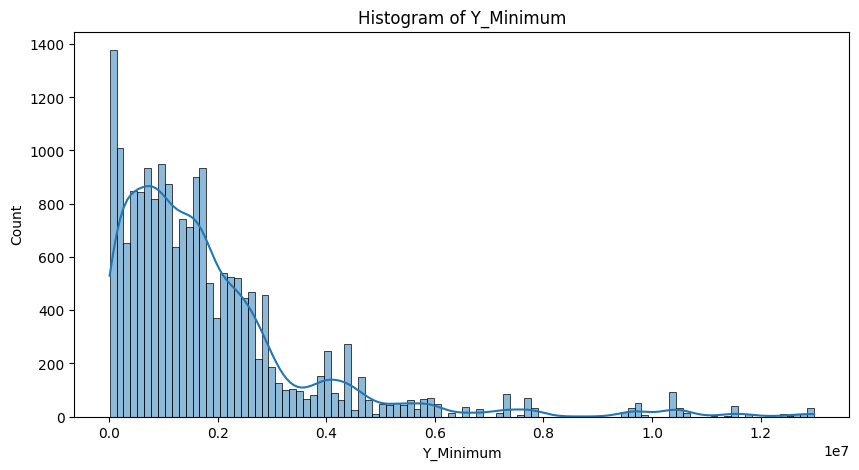

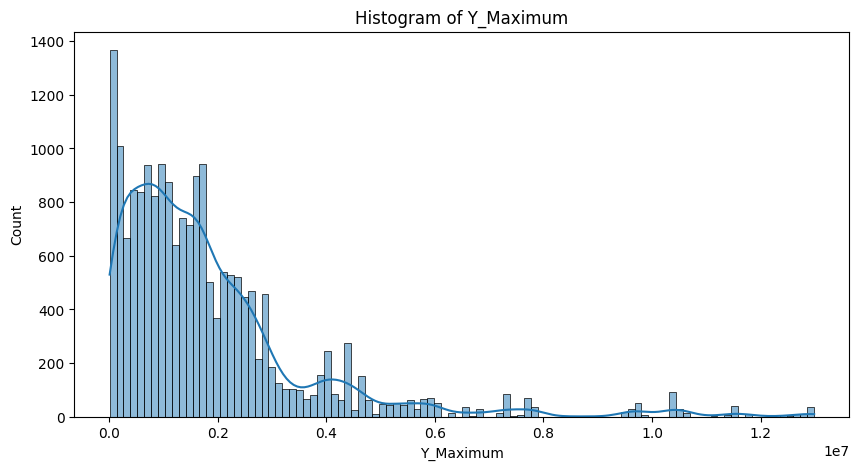

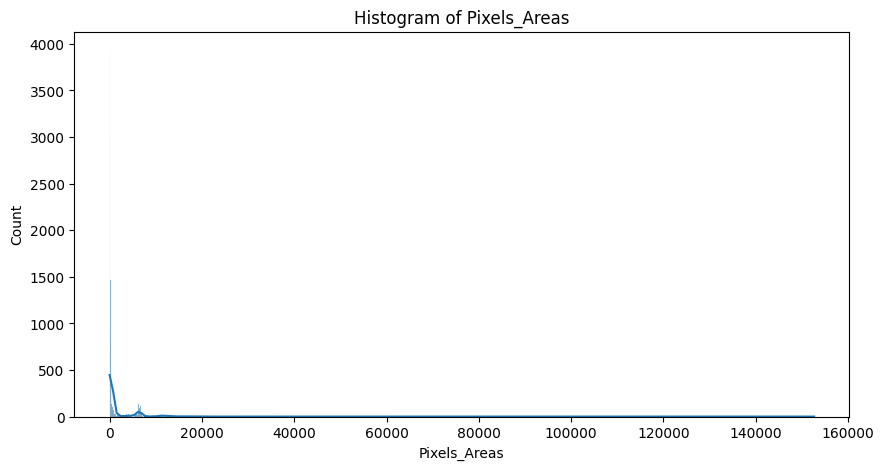

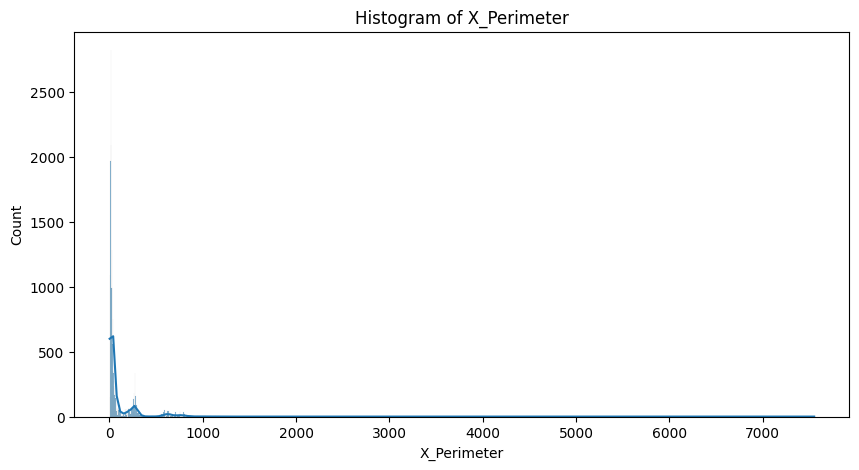

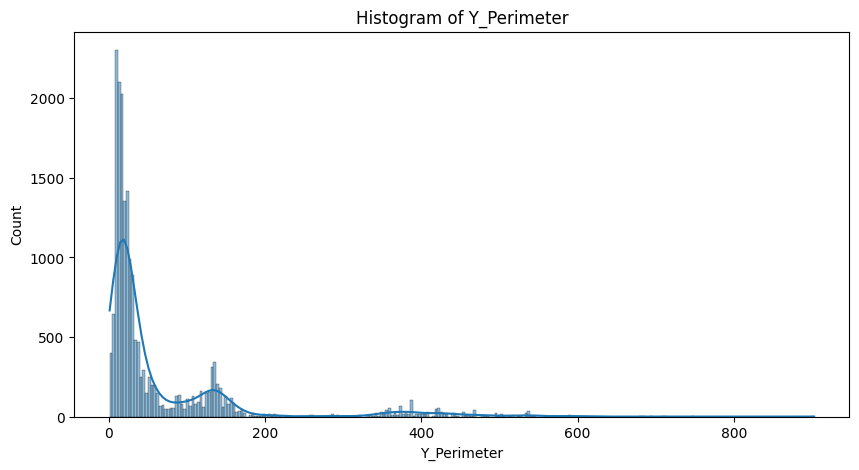

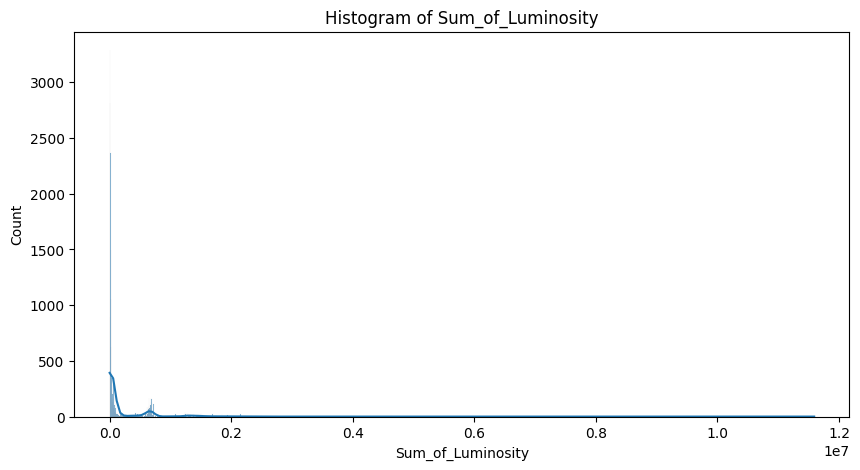

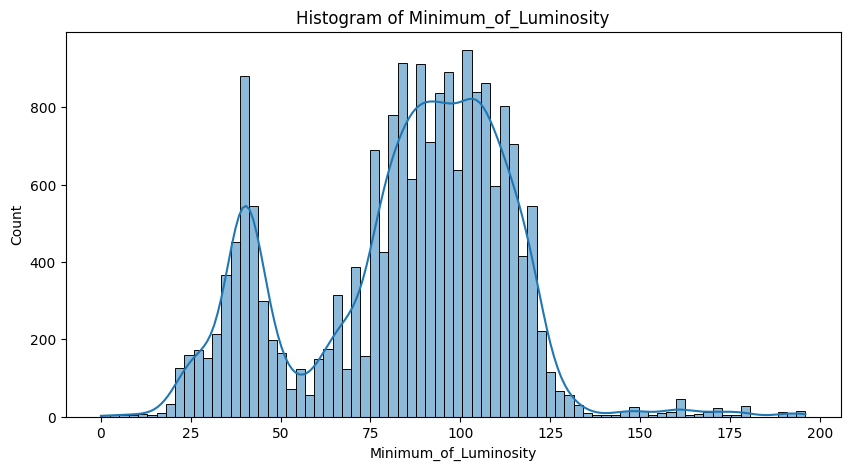

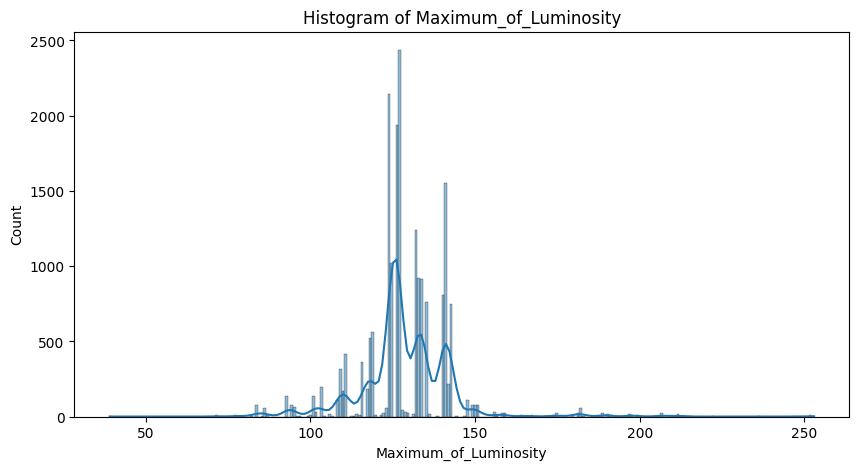

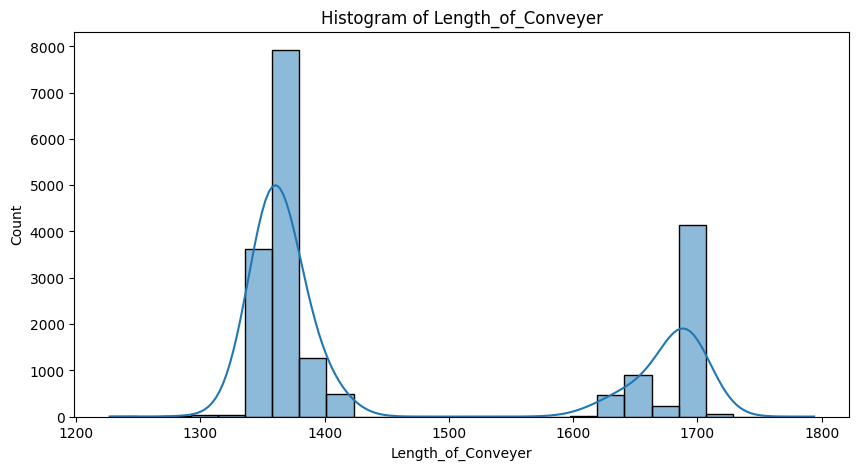

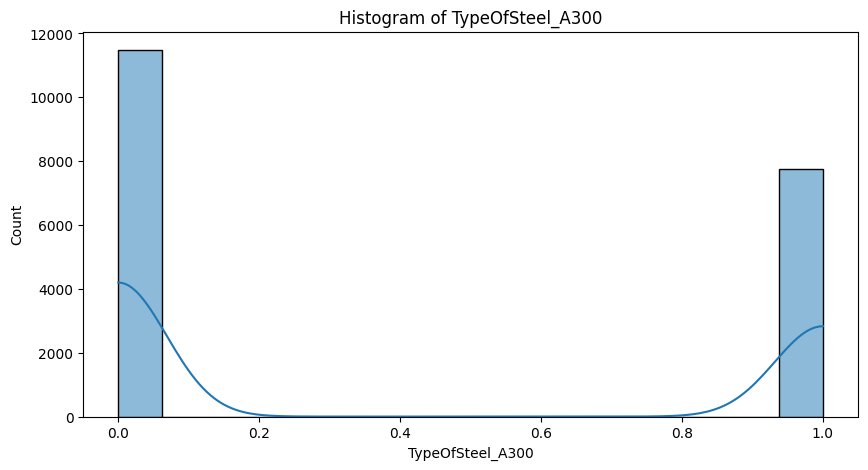

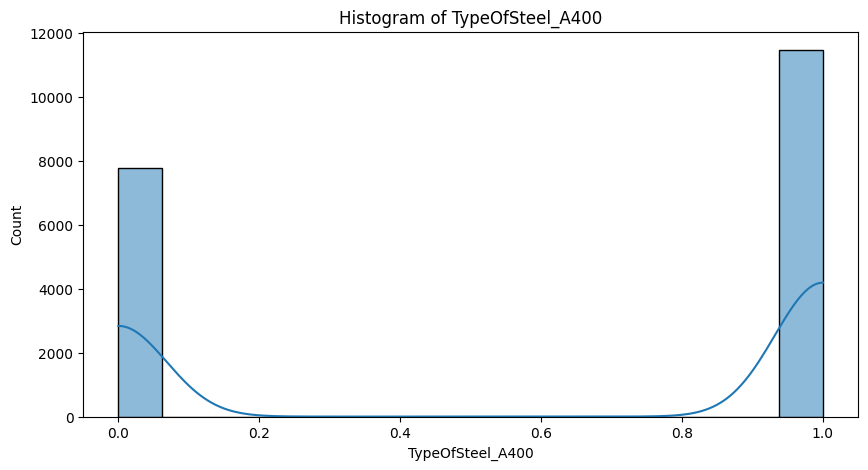

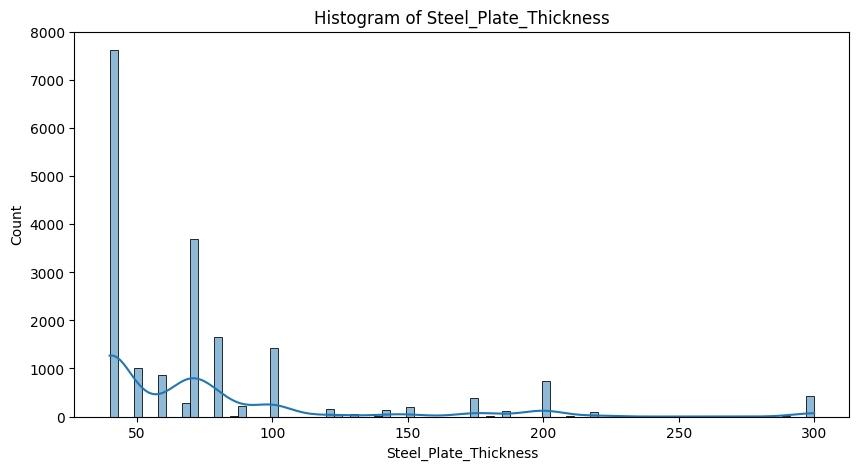

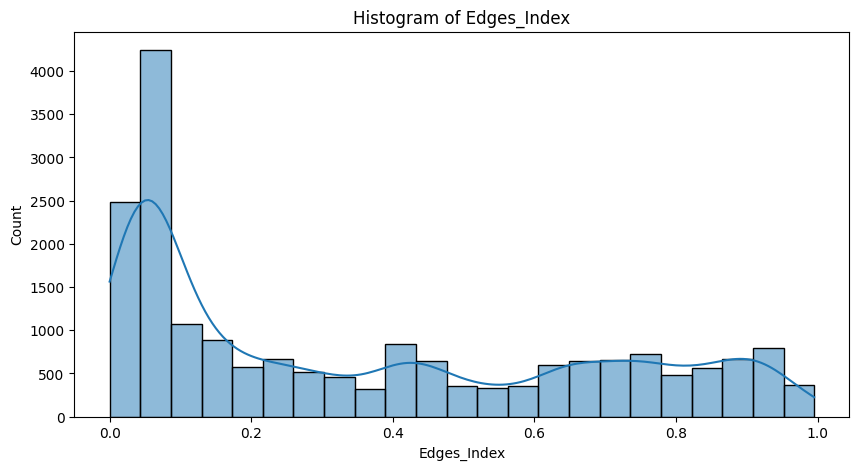

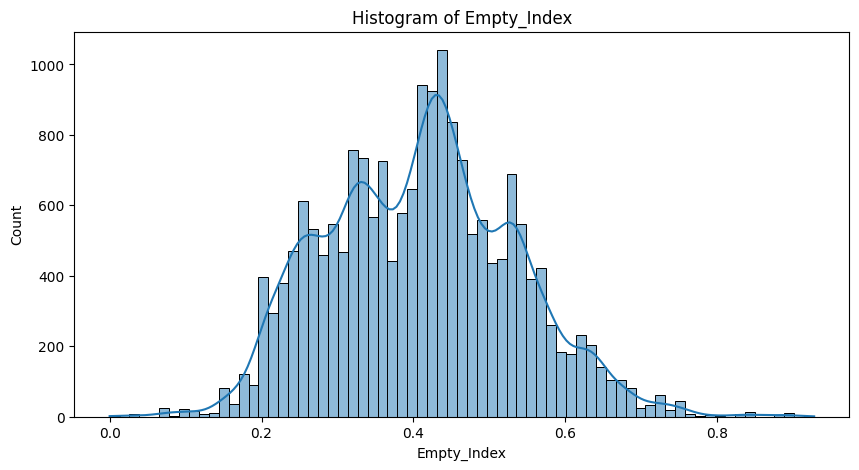

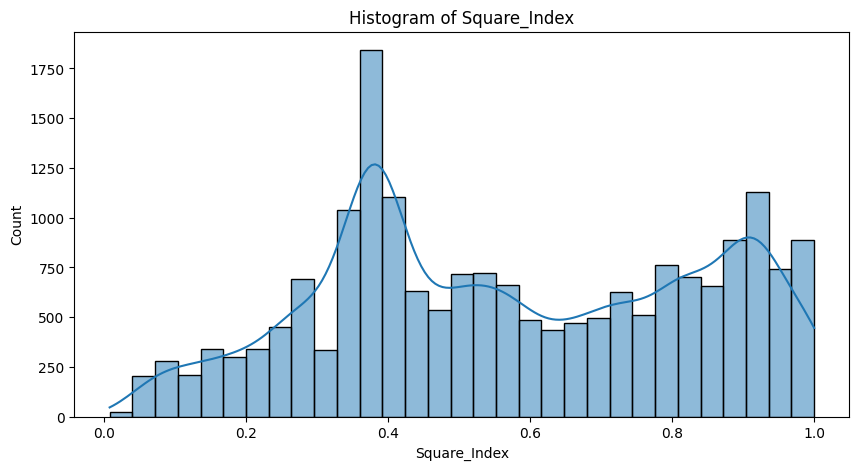

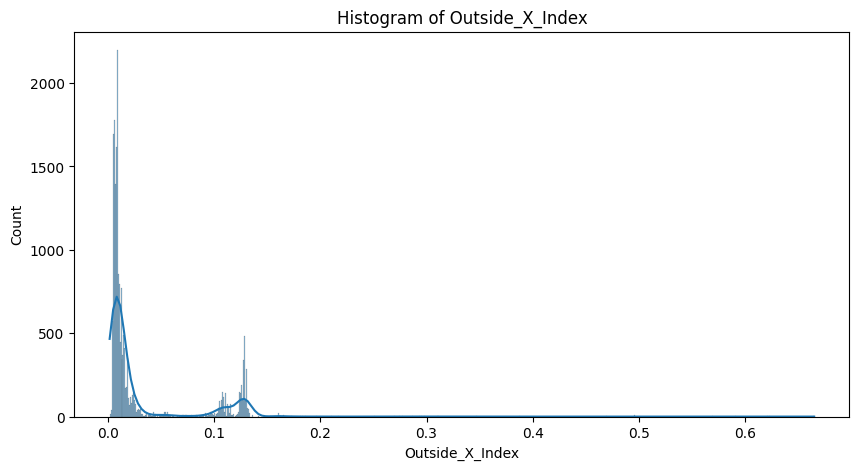

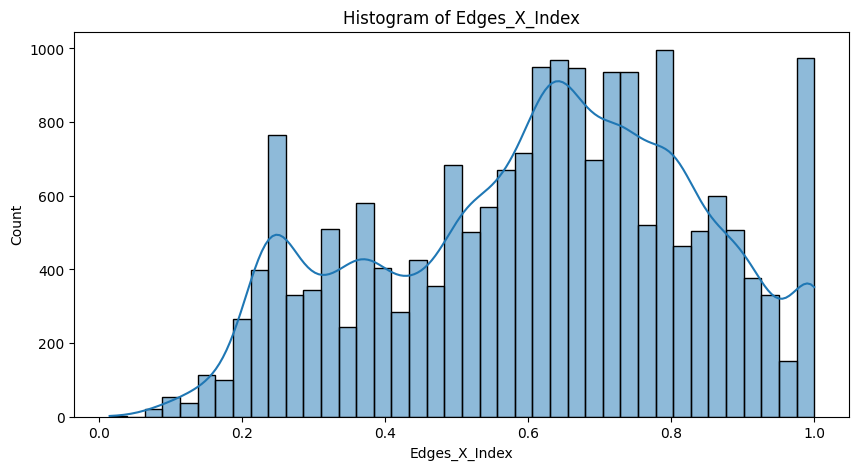

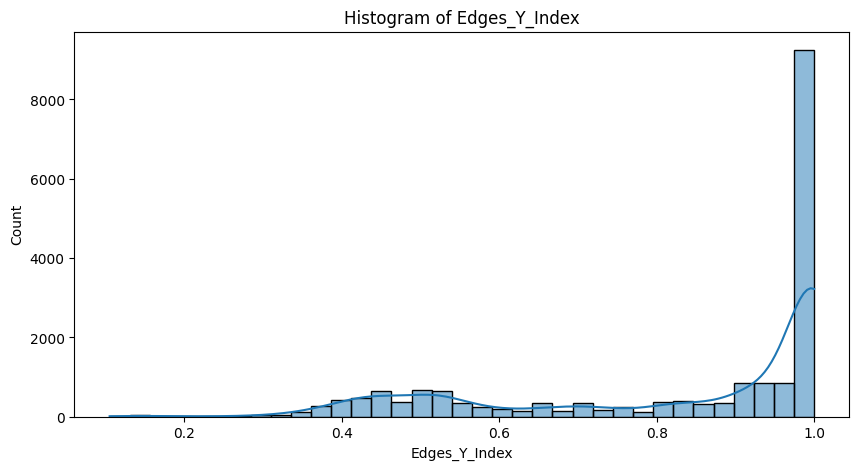

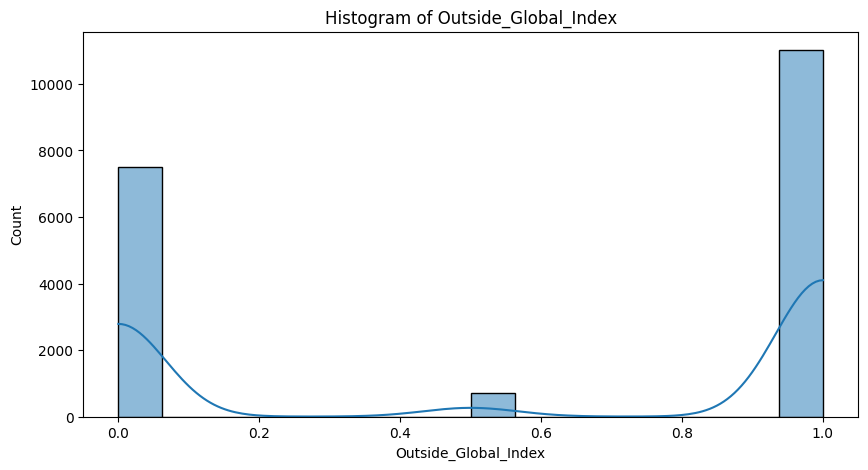

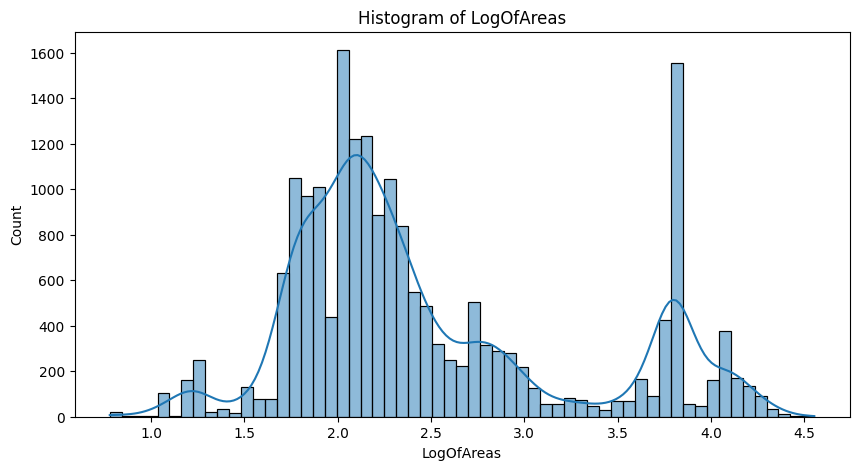

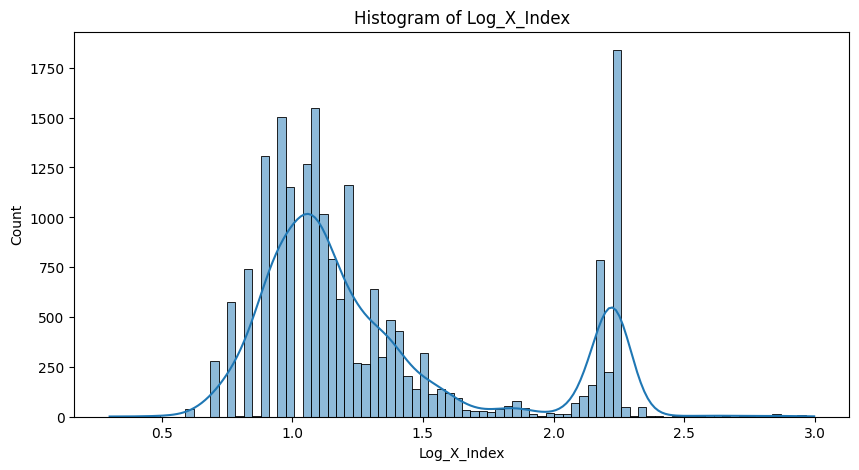

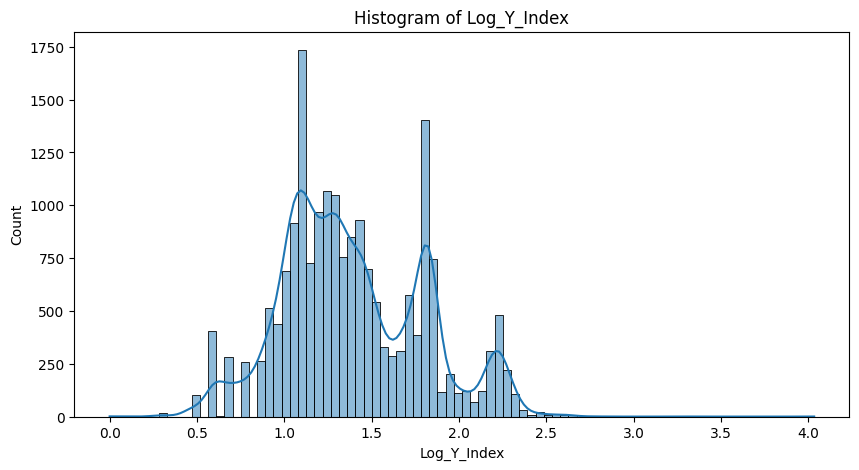

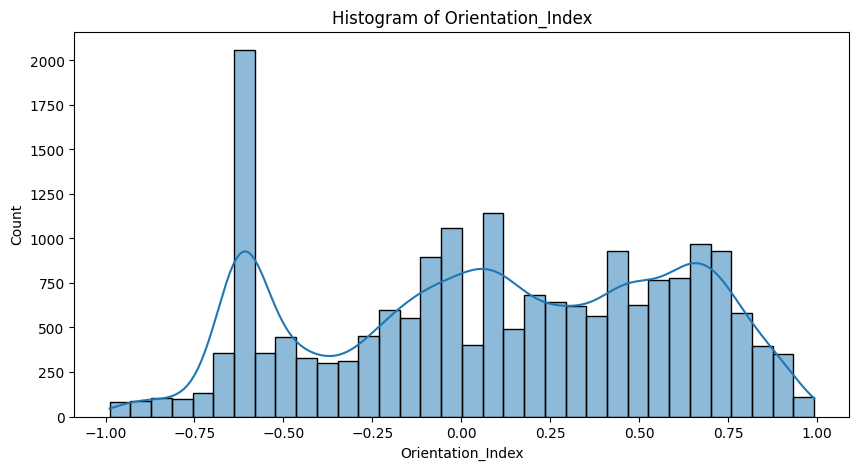

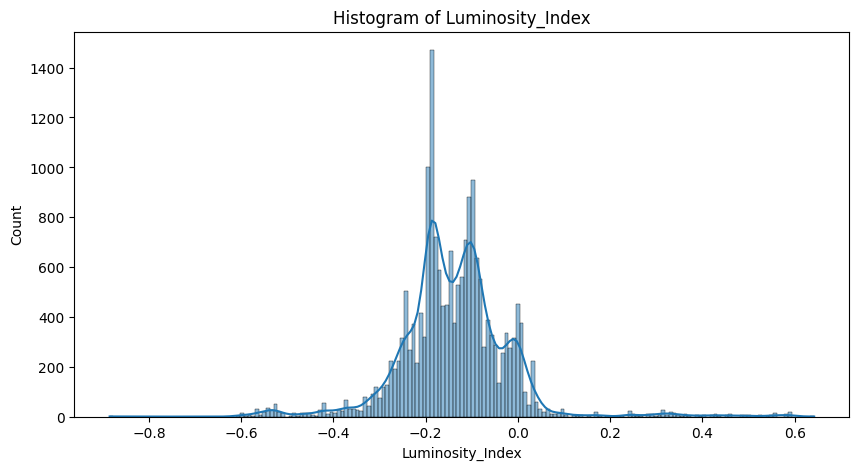

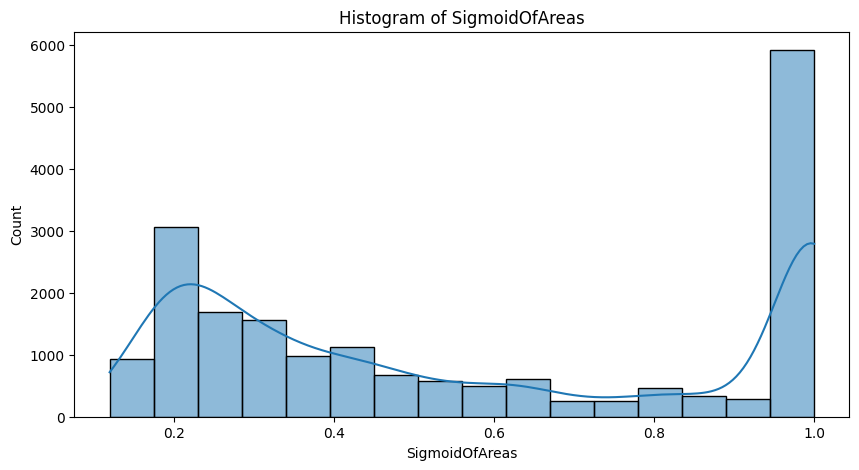

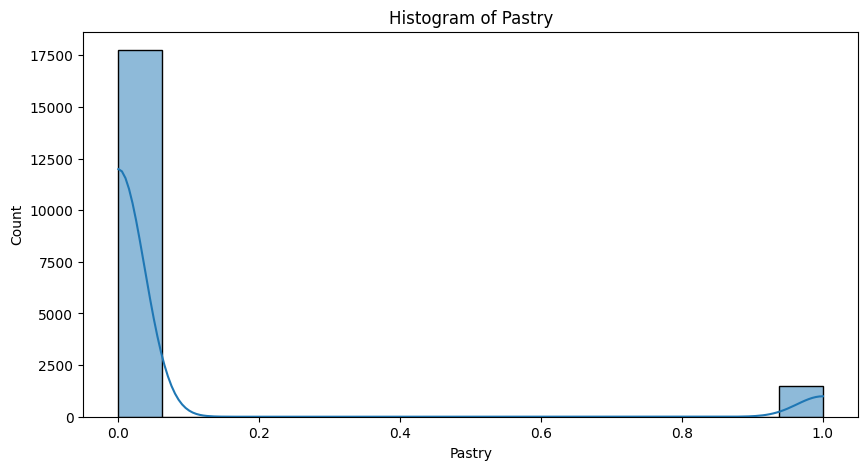

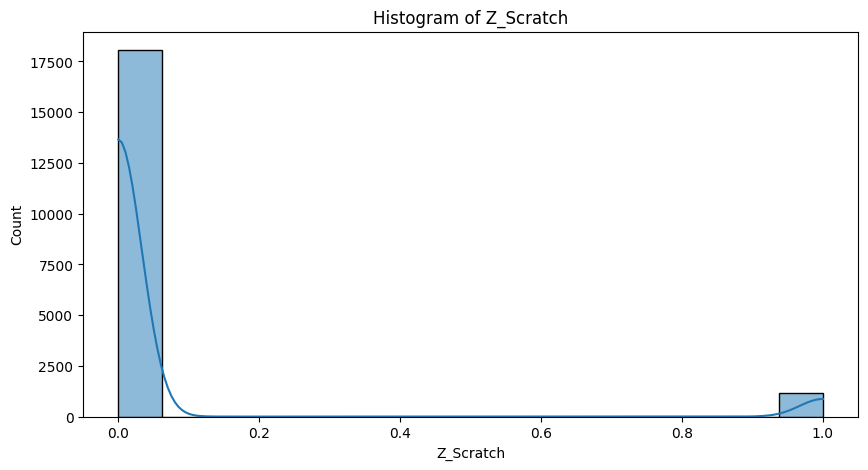

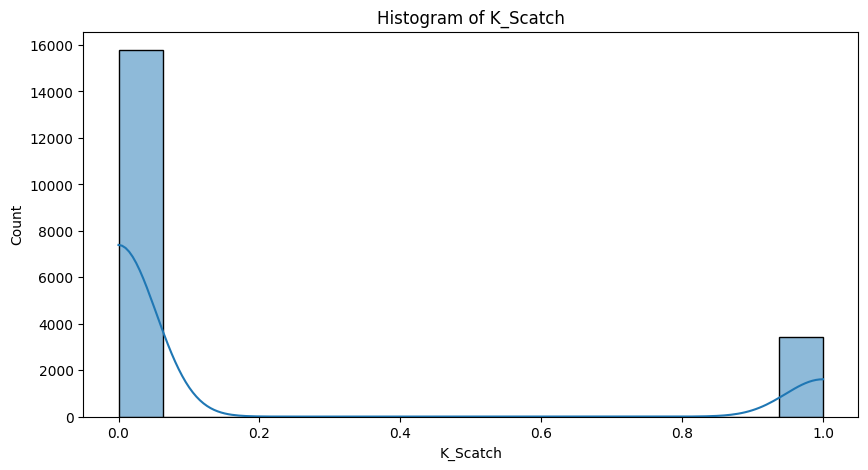

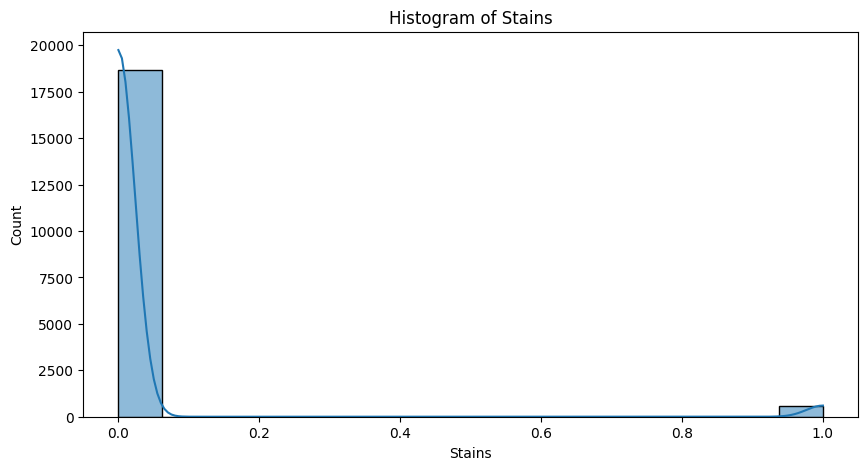

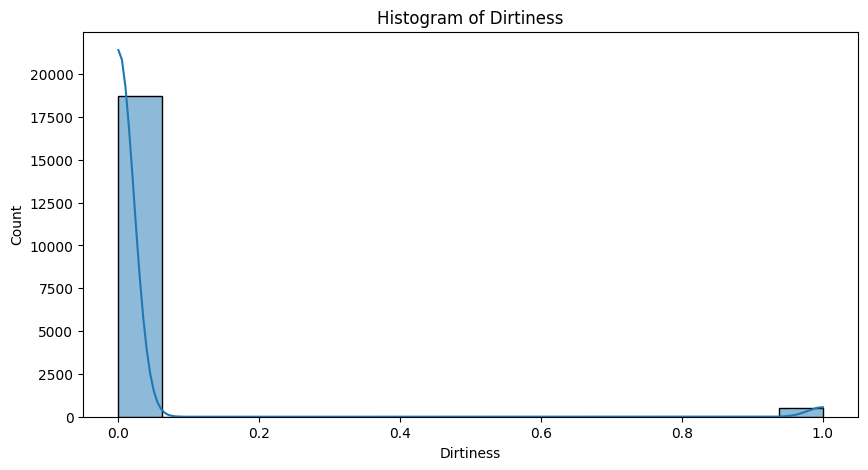

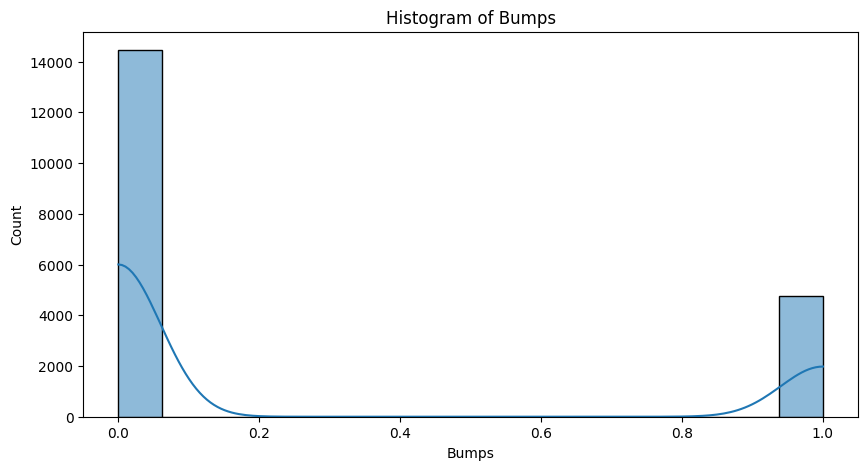

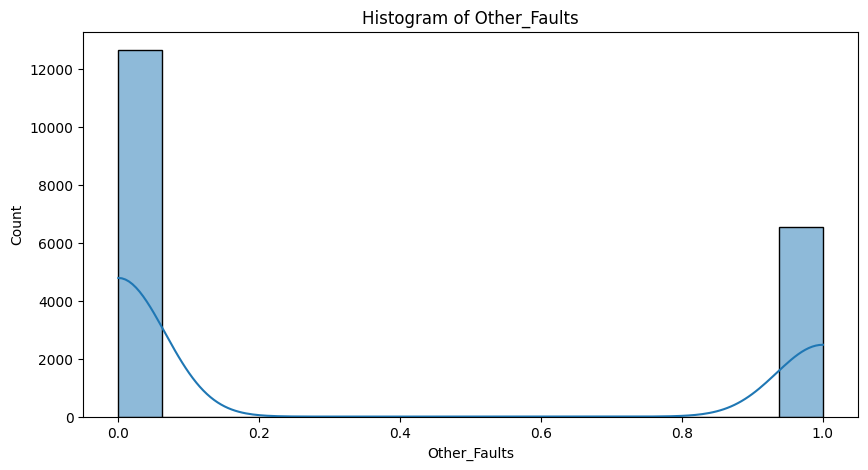

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Bar charts for categorical data
for column in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()
